In [ ]:
from brian2 import *
from scipy import signal
import numpy as np
%matplotlib notebook

In [2]:
def back_current(mean, std, enhancement, runtime, dt, tau, N, order):
    sampling_rate = 1/dt
    nyquist = sampling_rate/2
    cutoff = 1/tau
    normalized_cutoff = cutoff/nyquist
    
    
    back_noise = np.random.normal(enhancement*mean, std, (int(runtime/dt), N))
    b, a = signal.butter(order, normalized_cutoff, btype='low', analog=False)
    back_noise_filt = signal.lfilter(b, a, back_noise[:,0])

    if(N > 1):
        for j in range(1, N):
            back_noise_filt = np.vstack((back_noise_filt, signal.lfilter(b, a, back_noise[:,j])))
    
    return back_noise_filt.T

def input_stimulus(mean, std, runtime, dt, tau, order):
    sampling_rate = 1/dt
    nyquist = sampling_rate/2
    cutoff = 1/tau
    normalized_cutoff = cutoff/nyquist

    input_noise= (np.random.normal(mean, std, int(runtime/dt)))
    
    b, a = signal.butter(order, normalized_cutoff, btype='low', analog=False)
    
    input_noise_filt = signal.lfilter(b, a, input_noise)
    
    for i in range(0, len(input_noise_filt)): 
        if(input_noise_filt[i] < 0):
            input_noise_filt[i] = 0
            
    return input_noise_filt

def psth(spike_t, tbin):
    t = 0
    count = 0
    freq = []
    tvec = []
    
    for k in range(0, size(spike_t)):
        while(spike_t[k] > t):
            freq.append(count/(20*tbin))
            count = 0;
            tvec.append(t)
            t += tbin;
            if(spike_t[k] <= t):
                count +=1;
        count +=1;
    
    return freq, tvec

In [3]:
##### SIMULATION #####

start_scope()

#zero_background = np.zeros(10000)
#print(shape(back_noise_filt))
back_current = back_current(55e-12, 70e-12, 1, 1, .0001, .002, 20, 1)
input_stimulus = input_stimulus(0, 2000e-12, 1, .0001, .5, 1)
I_back = TimedArray(back_current, dt = 0.1*ms)
I_input = TimedArray(input_stimulus, dt = 0.1*ms)
Vreversal = 0
v0 = -60e-3
R = 100e6
tau = 5*ms
taug = 5*ms

eqs = '''
dv/dt = (-v + I_back(t, i)*R + v0 + I_input(t)*R)/tau : 1

'''
#+ g*(v-Vreversal)
#dg/dt = -g/taug : 1
G = NeuronGroup(20, eqs, threshold='v>-50e-3', reset='v = -60e-3', method='exact', dt = 0.1*ms)
G.v = -60e-3

M = StateMonitor(G, 'v', record=True)
Mspk = SpikeMonitor(G)

run(1000*ms)

freq, tvec = psth(Mspk.t, 5*ms)


BrianObjectException: Original error and traceback:
Traceback (most recent call last):
  File "C:\Users\fung2\Anaconda3\lib\site-packages\brian2\core\network.py", line 843, in before_run
    obj.before_run(run_namespace)
  File "C:\Users\fung2\Anaconda3\lib\site-packages\brian2\groups\group.py", line 1067, in before_run
    self.update_abstract_code(run_namespace=run_namespace)
  File "C:\Users\fung2\Anaconda3\lib\site-packages\brian2\groups\neurongroup.py", line 169, in update_abstract_code
    group_name=self.group.name)
  File "C:\Users\fung2\Anaconda3\lib\site-packages\brian2\stateupdaters\base.py", line 155, in apply_stateupdater
    'is known' % method)
ValueError: No state updater with the name "exact" is known

Error encountered with object named "neurongroup_stateupdater".
Object was created here (most recent call only, full details in debug log):
  File "<ipython-input-3-4089afa77273>", line 23, in <module>
    G = NeuronGroup(20, eqs, threshold='v>-50e-3', reset='v = -60e-3', method='exact', dt = 0.1*ms)

An error occurred when preparing an object. ValueError: No state updater with the name "exact" is known
(See above for original error message and traceback.)

In [1]:
### PLOT NEURON VOLTAGES AND RASTER PLOT ###

figure(1)

subplot(8,1,1)
title('Layer 1 Neuron Voltages')
plot(M.t/ms, M.v[0], label='Neuron 0')
subplot(8,1,2)
plot(M.t/ms, M.v[1], label='Neuron 1')
subplot(8,1,3)
plot(M.t/ms, M.v[2], label='Neuron 1')
subplot(8,1,4)
plot(M.t/ms, M.v[3], label='Neuron 1')
subplot(8,1,5)
plot(M.t/ms, M.v[4], label='Neuron 1')
subplot(8,1,6)
plot(M.t/ms, M.v[5], label='Neuron 1')
subplot(8,1,7)
plot(M.t/ms, M.v[6], label='Neuron 1')
subplot(8,1,8)
plot(M.t/ms, M.v[7], label='Neuron 1')
xlabel('Time (ms)')
ylabel('v')

#### RASTER PLOT ####

figure(2)
title('Layer 1 Raster Plot')
scatter(Mspk.t/ms, Mspk.i)
ylim(-1, 20)


#### VOLTAGE PLOT ####
figure(3)
title('Layer 1 Neuron Voltages Combined plot')
plot(M.t/ms, M.v.T)

figure(4)
plot(back_current)

figure(5)
plot(input_stimulus)

##### PLOT PSTH #####
figure(6)
subplot(2,1,1)
plot(divide(tvec, ms), freq)
title('Layer 1 PSTH')
xlim(-100, 1100)
subplot(2,1,2)
plot(np.multiply(input_stimulus,1e12))
title('Input Stimulus')
xlim(-1000, 11000)

NameError: name 'figure' is not defined

In [1]:
##### CALCULATE PSTH #####



tvec = []
tbin = 5*ms
t = 0
count = 0
freq = []

for k in range(0, size(Mspk.t)):
    while(Mspk.t[k] > t):
        freq.append(count/(20*tbin))
        count = 0;
        tvec.append(t)
        t += tbin;
        if(Mspk.t[k] <= t):
            count +=1;
    
    #print(Mspk.t[k], t, count)
    count +=1;

#print(tvec)


NameError: name 'ms' is not defined

<IPython.core.display.Javascript object>


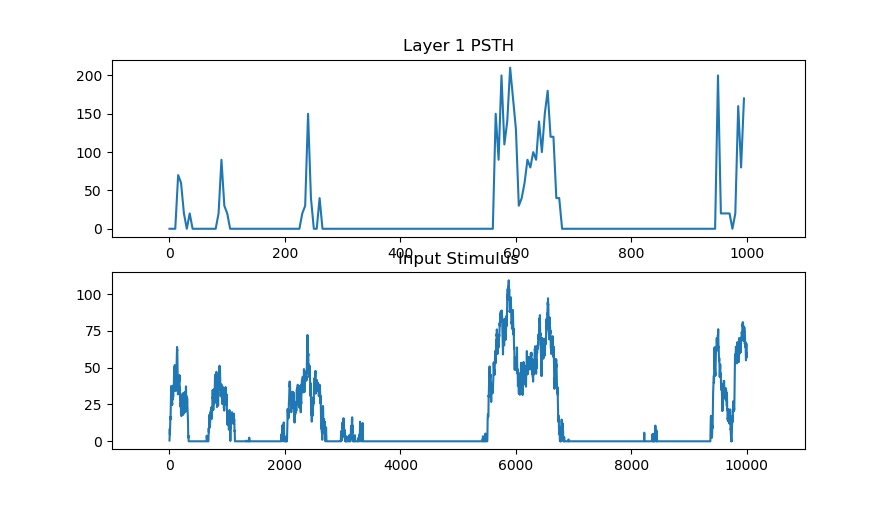

(-1000, 11000)

In [81]:
##### PLOT PSTH #####

figure(7)
subplot(2,1,1)
plot(divide(tvec, ms), freq)
title('Layer 1 PSTH')
xlim(-100, 1100)
subplot(2,1,2)
plot(np.multiply(input_stimulus,1e12))
title('Input Stimulus')
xlim(-1000, 11000)

In [109]:
##### DO NOT RUN. YE OLDE CODE. #####


start_scope()
vmean = -65*mV
Vreversal = 0*mV
taum = 20*ms
taue = 3*ms
taui = 2*ms
taug = 5*ms
runtime = 100*ms
noise = abs(np.random.normal(55, 70, int(runtime/(0.1*ms))))



eqs1 = Equations("""
                dv/dt  = (ohm*g*(v-Vreversal) -v+ ((70*xi+1.4*55*second**-0.5))*second**0.5*1e-12*amp*100e+6*ohm)/taum : volt (unless refractory)
                dg/dt = -g/taug : siemens
                """)
eqs = Equations("""
                dv/dt  = (ohm*g*(v-Vreversal) -v+ ((70*xi+55*second**-0.5))*second**0.5*1e-12*amp*100e+6*ohm)/taum : volt (unless refractory)
                dg/dt = -g/taug : siemens
                """)

G1 = NeuronGroup(20, eqs1, threshold='v > -50*mV', reset='v=-60*mV', refractory=1*ms, dt = .1*ms)
G1.v = -60*mV
#PG = PoissonGroup(20,10*Hz)
#C = Synapses(PG, G1, 'w : 1', on_pre='v += w*mV')
#C.connect()
#weights = np.random.random((20, 20))
#for i_ind in range(20):
    #for j_ind in range(20):
        #C.w[i_ind,j_ind] = weights[i_ind,j_ind]
# synapse parameters

G2 = NeuronGroup(20, eqs, threshold='v > -50*mV', reset='v=-60*mV', refractory=1*ms)
G2.v = -60*mV
G3 = NeuronGroup(20, eqs, threshold='v > -50*mV', reset='v=-60*mV', refractory=1*ms)
G3.v = -60*mV

s = Synapses(G1, G2, on_pre='g_post += 1e-8*siemens')
s.connect(condition='i != j')
s2 = Synapses(G2, G3, on_pre='g_post += 1e-8*siemens')
s2.connect(condition='i != j')

# Set the delays
s.delay = '1*ms + i*ms + 0.25*ms * randn()'
# Set the initial values of the synaptic variable
#s.w = 1
#mon1p = SpikeMonitor(PG)
mon1v = StateMonitor(G1, 'v', record=True)
mon1i = SpikeMonitor(G1)
mon2v = StateMonitor(G2, 'v', record=True)
mon2g = StateMonitor(G2, 'g', record=True)
mon2i = SpikeMonitor(G2)

run(runtime)




WARNING    "i" is an internal variable of group "synapses_1", but also exists in the run namespace with the value 998. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    "i" is an internal variable of group "synapses_2", but also exists in the run namespace with the value 998. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
INFO       No numerical integration method specified for group 'neurongroup_2', using method 'euler' (took 0.02s, trying other methods took 0.00s). [brian2.stateupdaters.base.method_choice]
WARNING    "g" is an internal variable of group "neurongroup_2", but also exists in the run namespace with the value array([ -56.28956041,  142.54444444, -131.0150637 , ...,   21.93898668,
        117.20227246,  146.85593101]). The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
INFO       No numerical integration method specified for group 'neur

In [ ]:
######## BACKGROUND NOISE CURRENT #########
#injected into every layer


def back_current(mean, std, enhancement, runtime, dt, tau, N, order)
    sampling_rate = 1/dt
    nyquist = sampling_rate/2
    cutoff = 1/tau
    normalized_cutoff = cutoff/nyquist
    
    
    back_noise = np.random.normal(enhancement*mean, std, (int(runtime/dt), N))
    b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)
    back_noise_filt = signal.lfilter(b, a, back_noise[:,0])

    for j in range(1, 20):
        back_noise_filt = np.vstack((back_noise_filt, signal.lfilter(b, a, back_noise[:,j])))
    
    back_noise_filt = back_noise_filt.T

runtime = 1000*ms
dt = 0.1*ms
sampling_rate = 1/.0001
nyquist = sampling_rate/2
Wn = 50/nyquist
wc = .05

back_noise = np.random.normal(1.4*55e-12, 70e-12, (int(runtime/dt), 20))
#print(np.std(back_noise[:,1]))
#print(np.shape(back_noise))
cutoff = 1/.002
order = 1
normal_cutoff = cutoff/nyquist

b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)
back_noise_filt = signal.lfilter(b, a, back_noise[:,0])
#print(shape(back_noise_filt))

for j in range(1, 20):
    back_noise_filt = np.vstack((back_noise_filt, signal.lfilter(b, a, back_noise[:,j])))

back_noise_filt = back_noise_filt.T
#plot(back_noise_filt.T)
#for j in range(0, 20):
#    print(np.std(back_noise_filt[:,j]))

In [ ]:
######## INPUT LAYER STIMULUS ########
#injected only into input layer

input_noise= (np.random.normal(0, 2000e-12, int(runtime/dt)))

input_cutoff = 1/.5
input_order = 1
input_normal_cutoff = input_cutoff/nyquist
b, a = signal.butter(order, input_normal_cutoff, btype='low', analog=False)
input_noise_filt = signal.lfilter(b, a, input_noise)

### half-wave rectification ###
input_rectif = []
for i in range(0, len(input_noise_filt)): 
    if(input_noise_filt[i] < 0):
        input_rectif.append(0)
    else:
        input_rectif.append(input_noise_filt[i])


In [ ]:
##### PLOT BACKGROUND CURRENT #####

figure(1)
subplot(2,1,1)
plot(back_noise[:,0])
grid()
title("Background Noise Unfiltered")
subplot(2,1,2)
plot(back_noise_filt[:,0])
grid()
title("Filtered Background Noise tau = .002s")

In [ ]:
######## PLOT INPUT LAYER STIMULUS ########

figure(2)
subplot(3,1,1)
plot(input_noise)
grid()
title("Input Stimulus Unfiltered")
subplot(3,1,2)
plot(input_noise_filt)
grid()
title("Filtered Input Stimulus tau = .5s")
subplot(3,1,3)
plot(input_rectif)
grid()
title("Rectified Filtered Input Stimulus tau = .05s")